In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
data = pd.read_csv("C:\\Users\\ASMITPAUL\\Downloads\\threats.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.01,-2.42,2.00,-0.50,0.55,0.21,0.11,0.15,-0.15,0.77,...,0.27,0.35,-1.18,-1.51,0.00,-0.97,0.00,-0.44,0.13,0
999996,-0.02,2.84,-3.70,-0.15,-0.67,2.65,2.59,-0.85,-0.21,-0.68,...,-0.10,0.88,0.50,-0.05,-0.89,-0.04,0.17,0.12,-0.01,0
999997,-0.01,-0.29,-1.90,-0.81,1.02,0.42,0.13,0.79,-0.58,0.60,...,0.03,-1.04,-0.35,0.17,0.36,0.08,-0.10,-0.05,0.01,0
999998,-0.02,2.07,2.05,0.04,0.84,0.11,-0.19,0.35,-0.17,-0.07,...,0.58,0.42,-0.69,-0.47,0.06,-0.20,-0.73,0.24,-0.07,0


In [12]:
data["Threat"].value_counts()

Threat
0    998092
1      1908
Name: count, dtype: int64

In [3]:
X = data[data.columns[:88]]
y = data["Threat"]

In [4]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [6]:
tree_classifier = DecisionTreeClassifier(max_depth=5)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [7]:
predictions = tree_classifier.predict(X_test)

In [8]:
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [9]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7701816214429024

Text(0, 0.5, 'True Positive Rate')

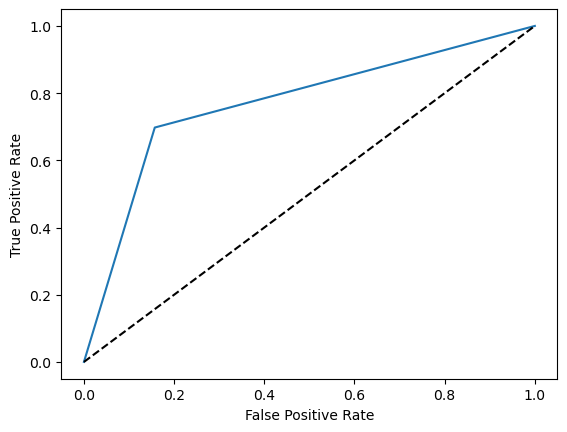

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [18]:
print("Recall:",recall_score(y_test,predictions))
print("Precision:",precision_score(y_test,predictions))

Recall: 0.6975470564677613
Precision: 0.8164123836977665
